# Análise Exploratória - Após Plano Real

## Env

In [2]:
import os
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)
import matplotlib.pyplot as plt
import seaborn as sns

## Dataframe

In [3]:
#Inicio do plano real em 1 de julho de 1994
folder = '../../datalake/serving/bovespa_plano_real.csv'
file_name = [f for f in os.listdir(folder) if f.endswith('.csv')][0]
df = pd.read_csv(
    f'{folder}/{file_name}',
    sep=';'
)
df.head()

,Register Type,Trading Date,BDI Code,Negociation Code,Market Type,Trade Name,Specification,Forward Market Term In Days,Currency,Opening Price,Max. Price,Min. Price,Mean Price,Last Trade Price,Best Purshase Order Price,Best Purshase Sale Price,Numbor Of Trades,Number Of Traded Stocks,Volume Of Traded Stocks,Price For Options Market Or Secondary Term Market,Price Corrections For Options Market Or Secondary Term Market,Due Date For Options Market Or Secondary Term Market,Factor Of Paper Quotatuion,Points In Price For Options Market Referenced In Dollar Or Secondary Term,ISIN Or Intern Code,Distribution Number,Year,Month,Trading Date Format,BDI Code Name,Specification Name
0,1,20180816,78,CYREI12,70,CYRE FM,ON NM,0.00,R$,57.00,57.00,48.00,52.00,48.00,0.00,0.00,2.00,2000.00,105000.00,1200.00,0.00,20180917.00,1.00,0.00,BRCYREACNOR7,130.00,2018,8,2018-08-16,OPCOES DE COMPRA,NaN
1,1,20180816,78,ITSAI117,70,ITSAE,PN N1,0.00,R$,24.00,24.00,20.00,21.00,20.00,0.00,20.00,5.00,17400.00,378200.00,1068.00,0.00,20180917.00,1.00,0.00,BRITSAACNPR7,383.00,2018,8,2018-08-16,OPCOES DE COMPRA,NaN
2,1,20180801,78,CMIGJ915,70,CMIGE,PN N1,0.00,R$,35.00,40.00,35.00,38.00,40.00,0.00,0.00,2.00,60000.00,2300000.00,915.00,0.00,20181015.00,1.00,0.00,BRCMIGACNPR3,221.00,2018,8,2018-08-01,OPCOES DE COMPRA,NaN
3,1,20180816,78,PETRB25,70,PETR /EJ,PN N2,0.00,R$,150.00,150.00,150.00,150.00,150.00,0.00,200.00,1.00,2500.00,375000.00,2492.00,0.00,20190218.00,1.00,0.00,BRPETRACNPR6,187.00,2018,8,2018-08-16,OPCOES DE COMPRA,NaN
4,1,20180801,78,ITSAI15,70,ITSA FM,PN N1,0.00,R$,53.00,62.00,53.00,56.00,53.00,35.00,80.00,7.00,61300.00,3490300.00,1045.00,0.00,20180917.00,1.00,0.00,BRITSAACNPR7,379.00,2018,8,2018-08-01,OPCOES DE COMPRA,NaN


## Análise Univariada

In [4]:
numeric_columns = [
    'Opening Price', 'Max. Price', 'Min. Price',
    'Mean Price', 'Last Trade Price', 'Best Purshase Order Price',
    'Best Purshase Sale Price', 'Numbor Of Trades', 'Number Of Traded Stocks',
    'Volume Of Traded Stocks'
]
df[numeric_columns].describe()

,Opening Price,Max. Price,Min. Price,Mean Price,Last Trade Price,Best Purshase Order Price,Best Purshase Sale Price,Numbor Of Trades,Number Of Traded Stocks,Volume Of Traded Stocks
count,1154144.00,1154144.00,1154144.00,1154144.00,1154144.00,1154144.00,1154144.00,1154144.00,1154144.00,1154144.00
mean,208.21,211.30,205.11,207.74,208.14,41.92,40.81,4.92,12212.64,664657.54
std,348.85,349.77,347.80,348.61,348.65,93.30,78.84,6.23,21260.72,976433.07
min,1.00,1.00,1.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00
25%,25.00,27.00,24.00,25.00,25.00,0.00,0.00,1.00,784.00,29045.00
50%,80.00,84.00,78.00,80.00,80.00,0.00,0.00,2.00,3100.00,193300.00
75%,215.00,220.00,210.00,214.00,215.00,31.00,41.00,6.00,12600.00,888615.75
max,4000.00,4000.00,2025.00,2458.00,2025.00,862.00,362.00,37.00,123058.00,4401000.00


In [5]:
results = {'Stats': ['Mode', 'Median']}

for column in numeric_columns:
    mode = df[column].mode(dropna=True)
    mode = mode.iloc[0] if not mode.empty else None
    median = df[column].median(skipna=True)
    results[column] = [mode, median]

stats = pd.DataFrame(results)
stats.set_index('Stats', inplace=True)
stats

,Opening Price,Max. Price,Min. Price,Mean Price,Last Trade Price,Best Purshase Order Price,Best Purshase Sale Price,Numbor Of Trades,Number Of Traded Stocks,Volume Of Traded Stocks
Stats,,,,,,,,,,
Mode,1.00,1.00,1.00,1.00,1.00,0.00,0.00,1.00,1000.00,10000.00
Median,80.00,84.00,78.00,80.00,80.00,0.00,0.00,2.00,3100.00,193300.00


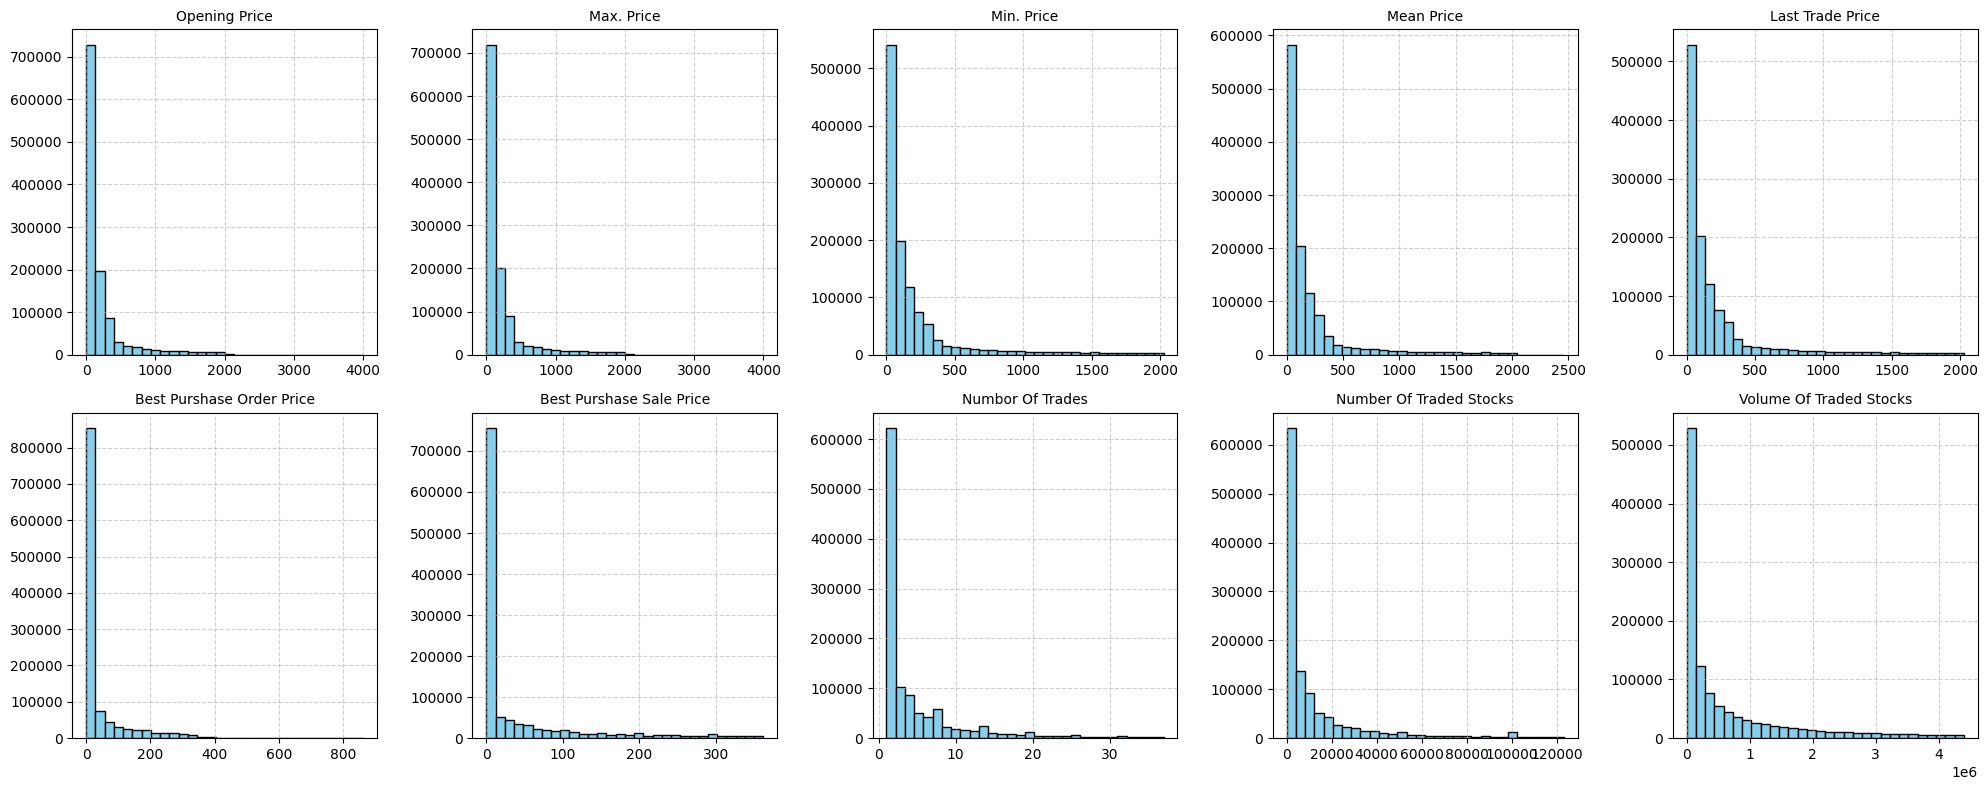

In [6]:
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    axes[i].hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(col, fontsize=10)
    axes[i].grid(True, linestyle='--', alpha=0.6)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Análise Multivariada

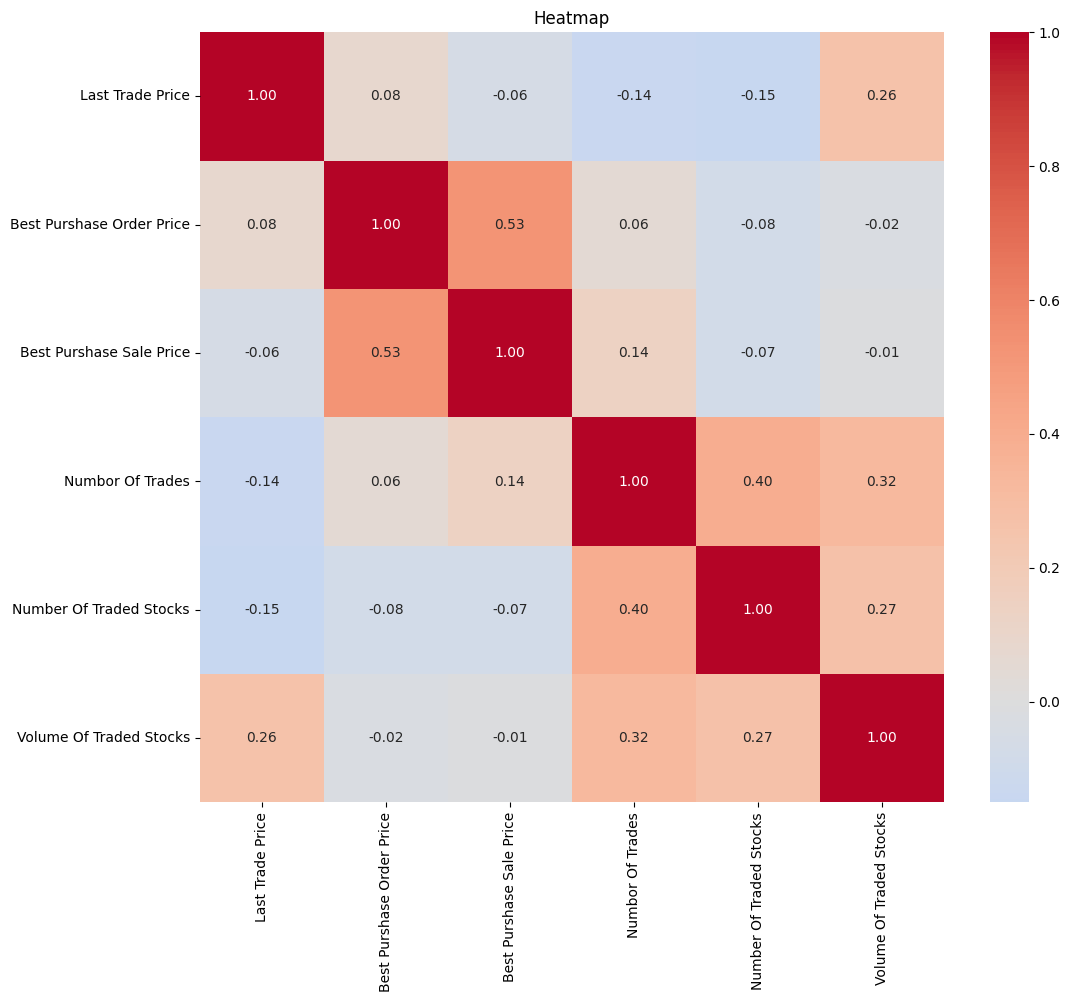

In [11]:
numeric_columns = [
    'Last Trade Price', 'Best Purshase Order Price',
    'Best Purshase Sale Price', 'Numbor Of Trades', 'Number Of Traded Stocks',
    'Volume Of Traded Stocks'
]

corr = df[numeric_columns].corr(method='pearson')

plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", center=0)
plt.title('Heatmap')
plt.show()